### Finding Movie Ratings and Personality Correlation - Lance Leski

In [1]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler  

In [2]:
data = pd.read_csv ('2018-personality-data.csv')
data

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,5.5,3.5,2.5,4.0,5.5,popularity,low,108979,4.246346,...,6643,4.409108,115122,3.960470,7700,4.178546,67997,4.085300,3,3
1830,1ab3a4c2921d8da640854819b0f6cfce,4.0,3.5,4.5,4.0,2.5,serendipity,high,93040,4.227140,...,5618,4.149697,903,4.116152,38061,4.155210,1197,4.045751,3,4
1831,a06386edadf3bc614dadb7044708c46c,6.0,3.0,5.5,3.5,6.0,serendipity,low,106173,3.935297,...,26519,3.998642,89707,4.144870,2571,3.860041,108709,3.899857,3,4
1832,bad56d9506832cd79d874a6b66b3d813,5.0,3.5,1.5,3.5,2.5,serendipity,medium,6874,4.241766,...,92259,4.819710,32,4.059369,3730,4.427336,3435,4.844386,4,4


In [3]:
ratings = pd.read_csv ('2018_ratings.csv')
ratings

,useri,movie_id,rating,tstamp
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,2001-09-10 17:19:56
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,2001-09-28 11:34:55
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,2001-09-28 11:42:50
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,2001-09-28 11:27:30
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,2002-01-07 18:12:02
...,...,...,...,...
1028746,721ea658e148fc0f76ddd6e2b0e02422,95167,1.5,2015-10-14 10:39:15
1028747,721ea658e148fc0f76ddd6e2b0e02422,103335,4.5,2015-10-14 10:21:55
1028748,721ea658e148fc0f76ddd6e2b0e02422,104374,3.5,2015-10-12 01:05:38
1028749,721ea658e148fc0f76ddd6e2b0e02422,107890,4.0,2015-10-14 05:30:08


In [7]:
data = data.dropna (how = 'any')

userID2 = list (ratings ['useri'])
movieID2 = list (ratings [' movie_id'])

userID1 = list (data ['userid'])

#first movie

movie1ID1 = list (data [' movie_1'])

rating = []

for index1 in range (len (data.userid)):
    true = 0
    for index2 in range (len (ratings.useri)):
        if ((userID1 [index1] == userID2 [index2]) & (movie1ID1 [index1] == movieID2 [index2])): 
            rating.append ((ratings [' rating']) [index2])
            true = 1
            break
    if (true == 0): rating.append (0)
        
data ['movie_1_rating'] = rating

#second movie

movie2ID1 = list (data [' movie_2'])

rating = []

for index1 in range (len (data.userid)):
    true = 0
    for index2 in range (len (ratings.useri)):
        if ((userID1 [index1] == userID2 [index2]) & (movie2ID1 [index1] == movieID2 [index2])): 
            rating.append ((ratings [' rating']) [index2])
            true = 1
            break
    if (true == 0): rating.append (0)
        
data ['movie_2_rating'] = rating

#third movie

movie3ID1 = list (data [' movie_3'])

rating = []

for index1 in range (len (data.userid)):
    true = 0
    for index2 in range (len (ratings.useri)):
        if ((userID1 [index1] == userID2 [index2]) & (movie3ID1 [index1] == movieID2 [index2])): 
            rating.append ((ratings [' rating']) [index2])
            true = 1
            break
    if (true == 0): rating.append (0)
        
data ['movie_3_rating'] = rating

#fourth movie

movie4ID1 = list (data [' movie_4'])

rating = []

for index1 in range (len (data.userid)):
    true = 0
    for index2 in range (len (ratings.useri)):
        if ((userID1 [index1] == userID2 [index2]) & (movie4ID1 [index1] == movieID2 [index2])): 
            rating.append ((ratings [' rating']) [index2])
            true = 1
            break
    if (true == 0): rating.append (0)
        
data ['movie_4_rating'] = rating

#fifth movie

movie5ID1 = list (data [' movie_5'])

rating = []

for index1 in range (len (data.userid)):
    true = 0
    for index2 in range (len (ratings.useri)):
        if ((userID1 [index1] == userID2 [index2]) & (movie5ID1 [index1] == movieID2 [index2])): 
            rating.append ((ratings [' rating']) [index2])
            true = 1
            break
    if (true == 0): rating.append (0)
        
data ['movie_5_rating'] = rating

#sixth movie

movie6ID1 = list (data [' movie_6'])

rating = []

for index1 in range (len (data.userid)):
    true = 0
    for index2 in range (len (ratings.useri)):
        if ((userID1 [index1] == userID2 [index2]) & (movie6ID1 [index1] == movieID2 [index2])): 
            rating.append ((ratings [' rating']) [index2])
            true = 1
            break
    if (true == 0): rating.append (0)
        
data ['movie_6_rating'] = rating

#seventh movie

movie7ID1 = list (data [' movie_7'])

rating = []

for index1 in range (len (data.userid)):
    true = 0
    for index2 in range (len (ratings.useri)):
        if ((userID1 [index1] == userID2 [index2]) & (movie7ID1 [index1] == movieID2 [index2])): 
            rating.append ((ratings [' rating']) [index2])
            true = 1
            break
    if (true == 0): rating.append (0)
        
data ['movie_7_rating'] = rating

#eigth movie

movie8ID1 = list (data [' movie_8'])

rating = []

for index1 in range (len (data.userid)):
    true = 0
    for index2 in range (len (ratings.useri)):
        if ((userID1 [index1] == userID2 [index2]) & (movie8ID1 [index1] == movieID2 [index2])): 
            rating.append ((ratings [' rating']) [index2])
            true = 1
            break
    if (true == 0): rating.append (0)
        
data ['movie_8_rating'] = rating

#ninth movie

movie9ID1 = list (data [' movie_9'])

rating = []

for index1 in range (len (data.userid)):
    true = 0
    for index2 in range (len (ratings.useri)):
        if ((userID1 [index1] == userID2 [index2]) & (movie9ID1 [index1] == movieID2 [index2])): 
            rating.append ((ratings [' rating']) [index2])
            true = 1
            break
    if (true == 0): rating.append (0)
        
data ['movie_9_rating'] = rating

#tenth movie

movie10ID1 = list (data [' movie_10'])

rating = []

for index1 in range (len (data.userid)):
    true = 0
    for index2 in range (len (ratings.useri)):
        if ((userID1 [index1] == userID2 [index2]) & (movie10ID1 [index1] == movieID2 [index2])): 
            rating.append ((ratings [' rating']) [index2])
            true = 1
            break
    if (true == 0): rating.append (0)
        
data ['movie_10_rating'] = rating

#eleventh movie

movie11ID1 = list (data [' movie_11'])

rating = []

for index1 in range (len (data.userid)):
    true = 0
    for index2 in range (len (ratings.useri)):
        if ((userID1 [index1] == userID2 [index2]) & (movie11ID1 [index1] == movieID2 [index2])): 
            rating.append ((ratings [' rating']) [index2])
            true = 1
            break
    if (true == 0): rating.append (0)
        
data ['movie_11_rating'] = rating

#twelth movie

movie12ID1 = list (data [' movie_12'])

rating = []

for index1 in range (len (data.userid)):
    true = 0
    for index2 in range (len (ratings.useri)):
        if ((userID1 [index1] == userID2 [index2]) & (movie12ID1 [index1] == movieID2 [index2])): 
            rating.append ((ratings [' rating']) [index2])
            true = 1
            break
    if (true == 0): rating.append (0)
        
data ['movie_12_rating'] = rating

data

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_3_rating,movie_4_rating,movie_5_rating,movie_6_rating,movie_7_rating,movie_8_rating,movie_9_rating,movie_10_rating,movie_11_rating,movie_12_rating
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.5
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,1.0,4.0,4.0,0.0,2.0,4.0,0.0,1.0,1.0,0.0
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3.5,5.0,4.5,3.5,5.0,5.0,4.5,4.0,3.0,4.5
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,4.0,3.5,4.0,4.0,3.5,3.5,3.5,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,5.5,3.5,2.5,4.0,5.5,popularity,low,108979,4.246346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1830,1ab3a4c2921d8da640854819b0f6cfce,4.0,3.5,4.5,4.0,2.5,serendipity,high,93040,4.227140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1831,a06386edadf3bc614dadb7044708c46c,6.0,3.0,5.5,3.5,6.0,serendipity,low,106173,3.935297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0
1832,bad56d9506832cd79d874a6b66b3d813,5.0,3.5,1.5,3.5,2.5,serendipity,medium,6874,4.241766,...,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,3.0,0.0


In [8]:
#Remove predicted ratings, assigned metric, assigned condition, userid, and movieid

data = data [[' openness', ' agreeableness', ' emotional_stability', ' conscientiousness', ' extraversion', ' movie_1', 'movie_1_rating', ' movie_2', 'movie_2_rating', ' movie_3', 'movie_3_rating', ' movie_4', 'movie_4_rating', ' movie_5', 'movie_5_rating', ' movie_6', 'movie_6_rating', ' movie_7', 'movie_7_rating', ' movie_8', 'movie_8_rating', ' movie_9', 'movie_9_rating', ' movie_10', 'movie_10_rating', ' movie_11', 'movie_11_rating', ' movie_12', 'movie_12_rating', ' is_personalized', ' enjoy_watching ']]

ndata = data [[' openness', ' agreeableness', ' emotional_stability', ' conscientiousness', ' extraversion', 'movie_1_rating', 'movie_2_rating', 'movie_3_rating', 'movie_4_rating', 'movie_5_rating', 'movie_6_rating', 'movie_7_rating', 'movie_8_rating', 'movie_9_rating', 'movie_10_rating', 'movie_11_rating', 'movie_12_rating', ' is_personalized', ' enjoy_watching ']]

data

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,movie_1,movie_1_rating,movie_2,movie_2_rating,movie_3,...,movie_9,movie_9_rating,movie_10,movie_10_rating,movie_11,movie_11_rating,movie_12,movie_12_rating,is_personalized,enjoy_watching
0,5.0,2.0,3.0,2.5,6.5,77658,0.0,95858,3.5,115713,...,120138,0.0,121372,0.0,127152,4.0,95311,4.5,4,4
1,7.0,4.0,6.0,5.5,4.0,94959,2.0,1247,3.5,953,...,56782,0.0,5618,1.0,969,1.0,1232,0.0,2,3
2,4.0,3.0,4.5,2.0,2.5,110501,0.0,77658,0.0,101895,...,2288,0.0,3307,0.0,1172,0.0,1212,0.0,2,2
3,5.5,5.5,4.0,4.5,4.0,2905,4.5,2843,0.0,3629,...,3030,4.5,1281,4.0,940,3.0,905,4.5,3,3
4,5.5,5.5,3.5,4.5,2.5,2905,4.5,2843,3.5,3629,...,3030,3.5,1281,4.0,940,4.0,905,4.0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,5.5,3.5,2.5,4.0,5.5,108979,0.0,33779,0.0,96728,...,6643,0.0,115122,0.0,7700,0.0,67997,0.0,3,3
1830,4.0,3.5,4.5,4.0,2.5,93040,0.0,1199,0.0,83134,...,5618,0.0,903,0.0,38061,0.0,1197,0.0,3,4
1831,6.0,3.0,5.5,3.5,6.0,106173,0.0,126397,0.0,109710,...,26519,0.0,89707,0.0,2571,3.5,108709,0.0,3,4
1832,5.0,3.5,1.5,3.5,2.5,6874,0.0,38061,0.0,46578,...,92259,0.0,32,0.0,3730,3.0,3435,0.0,4,4


In [9]:
#Filter out people who have literally given no reviews

#temp = data [(data.movie_1_rating >= 0) & (data.movie_2_rating >= 0) & (data.movie_3_rating >= 0) & (data.movie_4_rating >= 0) & (data.movie_5_rating >= 0) & (data.movie_6_rating >= 0) & (data.movie_7_rating >= 0) & (data.movie_8_rating >= 0) & (data.movie_9_rating >= 0) & (data.movie_10_rating >= 0) & (data.movie_11_rating >= 0) & (data.movie_12_rating >= 0)]

fdata = ndata [(data.movie_1_rating > 0) | (data.movie_2_rating > 0) | (data.movie_3_rating > 0) | (data.movie_4_rating > 0) | (data.movie_5_rating > 0) | (data.movie_6_rating > 0) | (data.movie_7_rating > 0) | (data.movie_8_rating > 0) | (data.movie_9_rating > 0) | (data.movie_10_rating > 0) | (data.movie_11_rating > 0) | (data.movie_12_rating > 0)]

fdata

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,movie_1_rating,movie_2_rating,movie_3_rating,movie_4_rating,movie_5_rating,movie_6_rating,movie_7_rating,movie_8_rating,movie_9_rating,movie_10_rating,movie_11_rating,movie_12_rating,is_personalized,enjoy_watching
0,5.0,2.0,3.0,2.5,6.5,0.0,3.5,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.5,4,4
1,7.0,4.0,6.0,5.5,4.0,2.0,3.5,1.0,4.0,4.0,0.0,2.0,4.0,0.0,1.0,1.0,0.0,2,3
3,5.5,5.5,4.0,4.5,4.0,4.5,0.0,3.5,5.0,4.5,3.5,5.0,5.0,4.5,4.0,3.0,4.5,3,3
4,5.5,5.5,3.5,4.5,2.5,4.5,3.5,4.0,3.5,4.0,4.0,3.5,3.5,3.5,4.0,4.0,4.0,2,3
6,4.5,4.0,6.0,5.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,5.0,2.5,6.5,6.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
1828,5.0,4.0,3.5,3.5,3.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4
1831,6.0,3.0,5.5,3.5,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,3,4
1832,5.0,3.5,1.5,3.5,2.5,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,3.0,0.0,4,4


In [10]:
x1 = fdata [[' openness', ' agreeableness', ' emotional_stability', ' conscientiousness', ' extraversion', 'movie_1_rating', 'movie_2_rating', 'movie_3_rating', 'movie_4_rating', 'movie_5_rating', 'movie_6_rating', 'movie_7_rating', 'movie_8_rating', 'movie_9_rating', 'movie_10_rating', 'movie_11_rating', 'movie_12_rating']]
y1 = fdata.loc [:,'personalized_labels'] = ["Not Personalized" if z < 2 else "Somewhat Personalized" if  2 <= z < 5 else "Personalized" for z in fdata [' is_personalized']]
y2 = fdata.loc [:,'enjoyed_labels'] = ["No Enjoyment" if z < 2 else "Some Enjoyment" if  2 <= z < 5 else "Enjoyed" for z in fdata [' enjoy_watching ']]

x_train, x_test, y_train, y_test = train_test_split (x1, y1, test_size = 0.30)  

cart = DecisionTreeClassifier ()
cart.fit (x_train, y_train)

C:\Users\Lance100\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Lance100\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


DecisionTreeClassifier()

In [11]:
train_pred = cart.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, train_pred))
print("confusion_matrix")
print(confusion_matrix(y_train, train_pred))

Accuracy: 1.0
confusion_matrix
[[ 50   0   0]
 [  0  50   0]
 [  0   0 640]]


In [12]:
test_pred = cart.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, test_pred))

Accuracy: 0.7389937106918238
confusion_matrix
[[  2   1  18]
 [  2   4  22]
 [ 17  23 229]]


In [13]:
#Trying new set of x variables

x2 = fdata [[' openness', ' agreeableness', ' emotional_stability', ' conscientiousness', ' extraversion', 'movie_1_rating', 'movie_2_rating', 'movie_3_rating', 'movie_4_rating', 'movie_5_rating', 'movie_6_rating' ]]
x_train, x_test, y_train, y_test = train_test_split (x2, y1, test_size = 0.30)  

cart = DecisionTreeClassifier()
cart.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
train_pred = cart.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, train_pred))
print("confusion_matrix")
print(confusion_matrix(y_train, train_pred))

Accuracy: 1.0
confusion_matrix
[[ 49   0   0]
 [  0  58   0]
 [  0   0 633]]


In [15]:
test_pred = cart.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, test_pred))

Accuracy: 0.6823899371069182
confusion_matrix
[[  0   0  22]
 [  1   0  19]
 [ 24  35 217]]


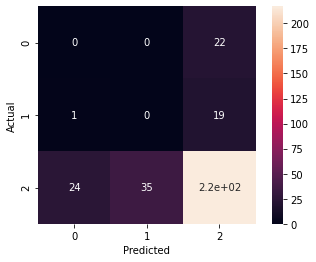

In [16]:
conf = confusion_matrix (y_test, test_pred) 
sns.heatmap (conf, annot=True, square=True);
plt.ylabel ('Actual');
plt.xlabel ('Predicted');

In [17]:
#Try and remove outliars (doesn't work)

x_train, x_test, y_train, y_test = train_test_split (x2, y1, test_size=0.30)  

cart = DecisionTreeClassifier ()
cart.fit (x_train, y_train)

scaler = StandardScaler ()  
scaler.fit (x_train)

x_train = scaler.transform (x_train)  
x_test = scaler.transform (x_test)

In [18]:
train_pred = cart.predict (x_train)
print ("Accuracy:",metrics.accuracy_score (y_train, train_pred))
print ("confusion_matrix")
print (confusion_matrix (y_train, train_pred))

Accuracy: 0.11621621621621622
confusion_matrix
[[  1  44   5]
 [  0  48   4]
 [  8 593  37]]


In [19]:
test_pred = cart.predict(x_test)
print ("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print ("confusion_matrix")
print (confusion_matrix(y_test, test_pred))

Accuracy: 0.10062893081761007
confusion_matrix
[[  0  19   2]
 [  3  20   3]
 [  6 253  12]]


In [20]:
#Looking for enjoyability now:

x3 = fdata [[' openness', ' agreeableness', ' emotional_stability', ' conscientiousness', ' extraversion', 'movie_1_rating', 'movie_2_rating', 'movie_3_rating', 'movie_4_rating', 'movie_5_rating', 'movie_6_rating', 'movie_7_rating', 'movie_8_rating', 'movie_9_rating', 'movie_10_rating', 'movie_11_rating', 'movie_12_rating']]
x_train, x_test, y_train, y_test = train_test_split (x3, y2, test_size = 0.30)  

cart = DecisionTreeClassifier()
cart.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
train_pred = cart.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, train_pred))
print("confusion_matrix")
print(confusion_matrix(y_train, train_pred))

Accuracy: 1.0
confusion_matrix
[[145   0   0]
 [  0  13   0]
 [  0   0 582]]


In [22]:
test_pred = cart.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, test_pred))

Accuracy: 0.6855345911949685
confusion_matrix
[[ 21   0  50]
 [  1   0   8]
 [ 38   3 197]]


In [23]:
#Trying the same new x variables:

x4 = fdata [[' openness', ' agreeableness', ' emotional_stability', ' conscientiousness', ' extraversion', 'movie_1_rating', 'movie_2_rating', 'movie_3_rating', 'movie_4_rating', 'movie_5_rating', 'movie_6_rating']]
x_train, x_test, y_train, y_test = train_test_split (x4, y2, test_size = 0.30)  

cart = DecisionTreeClassifier()
cart.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
train_pred = cart.predict (x_train)
print ("Accuracy:",metrics.accuracy_score(y_train, train_pred))
print ("confusion_matrix")
print (confusion_matrix(y_train, train_pred))

Accuracy: 1.0
confusion_matrix
[[154   0   0]
 [  0  18   0]
 [  0   0 568]]


In [25]:
test_pred = cart.predict (x_test)
print ("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print ("confusion_matrix")
print (confusion_matrix(y_test, test_pred))

Accuracy: 0.6289308176100629
confusion_matrix
[[ 14   0  48]
 [  0   1   3]
 [ 59   8 185]]


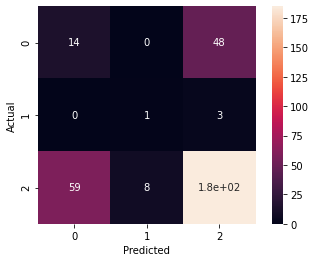

In [26]:
conf = confusion_matrix(y_test, test_pred) 
sns.heatmap (conf, annot=True, square=True);
plt.ylabel('Actual');
plt.xlabel('Predicted');

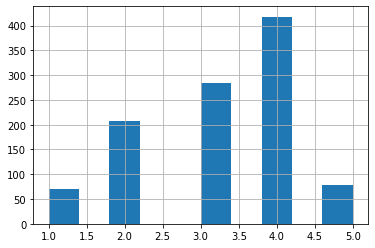

In [27]:
fdata [' is_personalized'].hist()

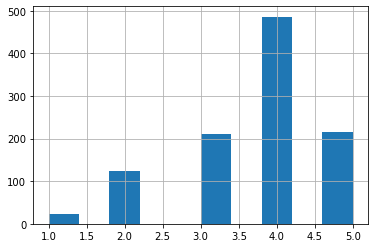

In [28]:
fdata [' enjoy_watching '].hist()

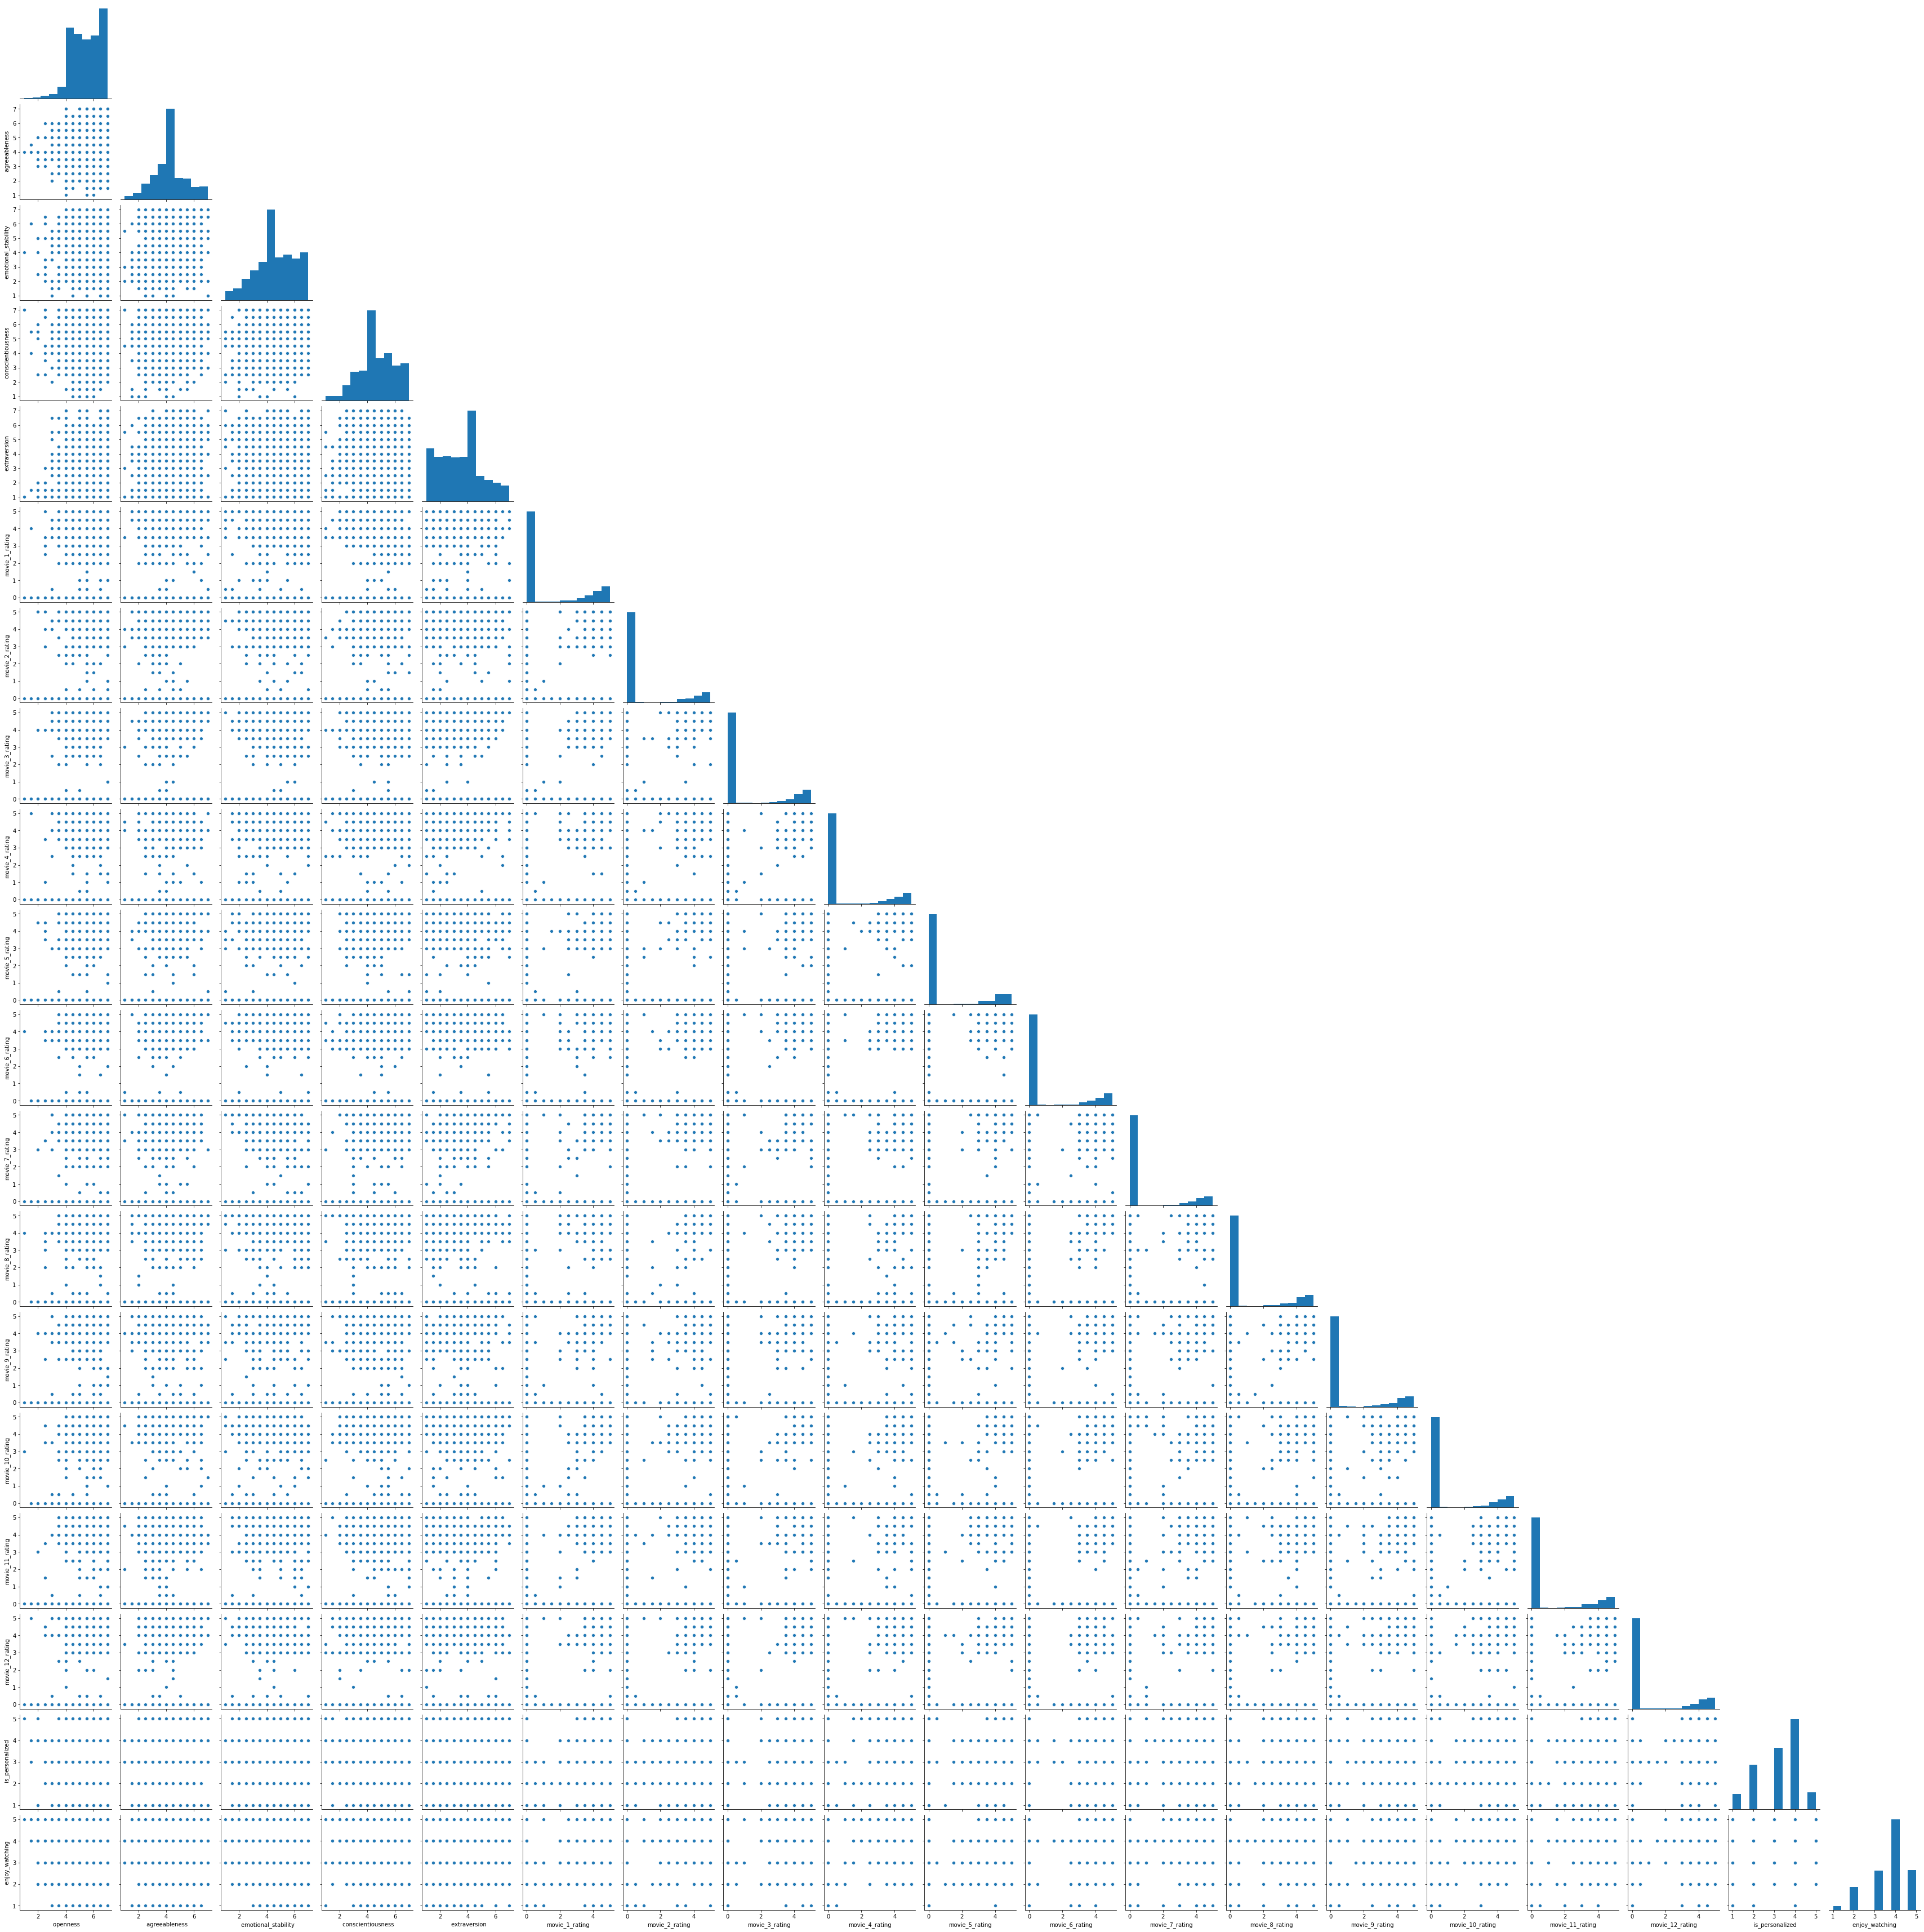

In [29]:
pairplot = sns.pairplot (fdata, corner=True)